Ch3 p40

If the data given are periodic and cover one period, the first and last points will have identical f-values and the beginning and ending slopes will be the same. Develop the relations that give a cubic spline curve for such periodic data. 

Answer:

My initial thought is to try the easist solution first which is to use end condition 2 and set the two end slopes, A and B, equal to the same value. It should be straightforward to see if the data repeats itself. 

See ch3_p41 for a test. 

Additional commentary:

The above idea in general works forces the end slopes towards each other. I spent maybe a week chasing my tail because I had a erroneous equation in my code for end condition 2. Otherwise, I think I would have figured this problem out fairly quickly. My initial intuition was correct. 

After the equation was fixed I discovered the best way to produce periodic results is actually by switching the approximate end slopes. This forces each end towards the slope of the other. 

The following code is the round-about investigation I completed trying to figure out how to make this periodic function work. Eventually, it was just a correct replica of previously implemented code that helped me spot my error in the original code. 

In [1]:
import numpy as np
from naf.incf import c_h, cubic_spline_poly_coeffs, cubic_spline_interpolation
from naf.linalg import doqsv
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [2]:
pts = np.array([[0.0, 0.302],
                [0.2, 0.185],
                [0.3, 0.106],
                [0.4, 0.093],
                [0.5, 0.240],
                [0.6, 0.579],
                [0.7, 0.561],
                [0.8, 0.468],
                [1.0, 0.302]])

h = c_h(pts[...,0])
print(h)

[0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.2]


In [3]:
# csm = np.array([[2*(h[-2] + h[0]), h[0], 0.0, 0.0, 0.0, 0.0, 0.0, h[-2], 0.0],
#                 [h[0], 2*(h[0] + h[1]), h[1], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                 [0.0, h[1], 2*(h[1] + h[2]), h[2], 0.0, 0.0, 0.0, 0.0, 0.0],
#                 [0.0, 0.0, h[2], 2*(h[2] + h[3]), h[3], 0.0, 0.0, 0.0, 0.0],
#                 [0.0, 0.0, 0.0, h[3], 2*(h[3] + h[4]), h[4], 0.0, 0.0, 0.0],
#                 [0.0, 0.0, 0.0, 0.0, h[4], 2*(h[4] + h[5]), h[5], 0.0, 0.0],
#                 [0.0, 0.0, 0.0, 0.0, 0.0, h[5], 2*(h[5] + h[6]), h[6], 0.0],
#                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, h[6], 2*(h[6] + h[7]), h[7]],
#                 [0.0, h[1], 0.0, 0.0, 0.0, 0.0, 0.0, h[7], 2*(h[7] + h[1])]])
# print(csm)

csm = np.array([[2*(h[0]), h[0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [h[0], 2*(h[0] + h[1]), h[1], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, h[1], 2*(h[1] + h[2]), h[2], 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, h[2], 2*(h[2] + h[3]), h[3], 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, h[3], 2*(h[3] + h[4]), h[4], 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, h[4], 2*(h[4] + h[5]), h[5], 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, h[5], 2*(h[5] + h[6]), h[6], 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, h[6], 2*(h[6] + h[7]), h[7]],
                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, h[7], 2*(h[7])]])
print(csm)

[[0.4 0.2 0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.6 0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.4 0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.4 0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.4 0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.4 0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.4 0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.6 0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.4]]


In [4]:
y = pts[...,1]
x = pts[...,0]
# b = np.array([6*((y[1] - y[0])/h[0] - (y[0] - y[-2])/(x[0] - x[-2])),
#               6*((y[2] - y[1])/h[1] - (y[1] - y[0])/h[0]),
#               6*((y[3] - y[2])/h[2] - (y[2] - y[1])/h[1]),
#               6*((y[4] - y[3])/h[3] - (y[3] - y[2])/h[2]),
#               6*((y[5] - y[4])/h[4] - (y[4] - y[3])/h[3]),
#               6*((y[6] - y[5])/h[5] - (y[5] - y[4])/h[4]),
#               6*((y[7] - y[6])/h[6] - (y[6] - y[5])/h[5]),
#               6*((y[8] - y[7])/h[7] - (y[7] - y[6])/h[6]),
#               6*((y[1] - y[8])/(x[1] - x[8]) - (y[8] - y[7])/h[7])])
b = np.array([6*((y[1] - y[0])/h[0] + 0.83),
              6*((y[2] - y[1])/h[1] - (y[1] - y[0])/h[0]),
              6*((y[3] - y[2])/h[2] - (y[2] - y[1])/h[1]),
              6*((y[4] - y[3])/h[3] - (y[3] - y[2])/h[2]),
              6*((y[5] - y[4])/h[4] - (y[4] - y[3])/h[3]),
              6*((y[6] - y[5])/h[5] - (y[5] - y[4])/h[4]),
              6*((y[7] - y[6])/h[6] - (y[6] - y[5])/h[5]),
              6*((y[8] - y[7])/h[7] - (y[7] - y[6])/h[6]),
              6*(-0.585 - (y[8] - y[7])/h[7])])
print(b)

[  1.47  -1.23   3.96   9.6   11.52 -21.42  -4.5    0.6    1.47]


In [5]:
s = doqsv(csm, b)
print(s)

[  6.488  -5.627   8.484  11.291  42.354 -65.505   5.467  -1.363   4.357]


In [6]:
csc = cubic_spline_poly_coeffs(s, y, h)
print(csc)

[[ -10.096   23.518    4.678   51.772 -179.765  118.287  -11.384    4.767]
 [   3.244   -2.813    4.242    5.645   21.177  -32.753    2.734   -0.682]
 [  -0.83    -0.744   -0.601    0.388    3.07     1.912   -1.09    -0.884]
 [   0.302    0.185    0.106    0.093    0.24     0.579    0.561    0.468]]


In [7]:
t1 = np.linspace(0,0.2,num=5)
t2 = np.linspace(0.25,0.8,num=12)
t3 = np.linspace(0.85,1.0,num=4)
t = np.concatenate((t1, t2, t3))
print(t)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [8]:
yi = np.zeros(t.size)
for i in range(t.size):
    yi[i] = cubic_spline_interpolation(csc, t[i], x)
print(yi)

[0.302 0.267 0.241 0.216 0.185 0.144 0.106 0.087 0.093 0.133 0.24  0.424
 0.579 0.608 0.561 0.512 0.468 0.423 0.378 0.336 0.302]


In [9]:
s1 = yi[0] - yi[1]
s2 = yi[-1] - yi[-2]
diff = abs(s1) - abs(s2)
print(s1, s2, diff)

0.03465149433184472 -0.03410004616111306 0.000551448170731661


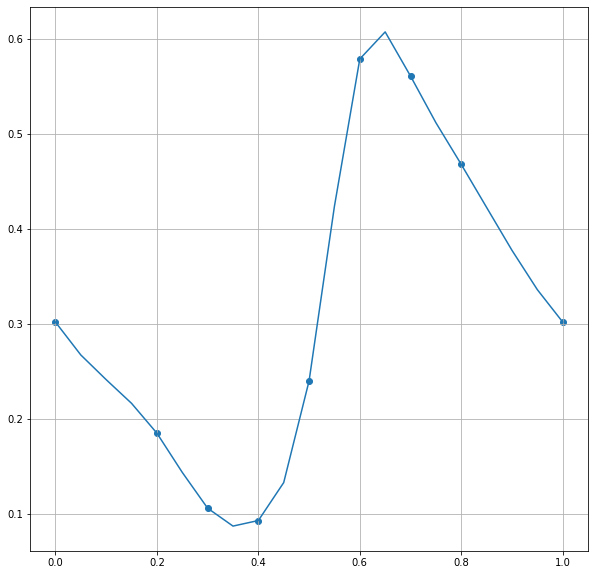

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
ax.plot(t, yi)
ax.scatter(pts[...,0], pts[...,1])
plt.show()